In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import cmocean.cm as cmo
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

In [2]:
path = "../data_for_plots/"

In [3]:
iso = xr.open_dataset(path + "isopycnal_eddy_heat_transports_details_0201-01-01_0300-12-30_zonal_integral_on_z.nc")
mld = (-1.) * xr.open_mfdataset(path + "MXLDEPTH_0201-01-01_0300-12-30_JJA_zonal_mean.nc").MXLDEPTH
mldmax = (-1.) * xr.open_mfdataset(path + "MXLDEPTH_0201-01-01_0300-12-30_max_zonal_max.nc").MXLDEPTH
ones = (iso.iso_ADV_z / iso.iso_ADV_z)
zs = (iso.Z * ones.where(ones==1, other=1)) + mld
zs[:, 0:2] = zs[:, 2:4].values

/tmp/ipykernel_72962/3153522705.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p1 = ax[0].pcolormesh(iso.YG, zs, iso.iso_ADV_z.T,
/tmp/ipykernel_72962/3153522705.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p2 = ax[1].pcolormesh(iso.YG, zs, iso.iso_DIFF_z.T,


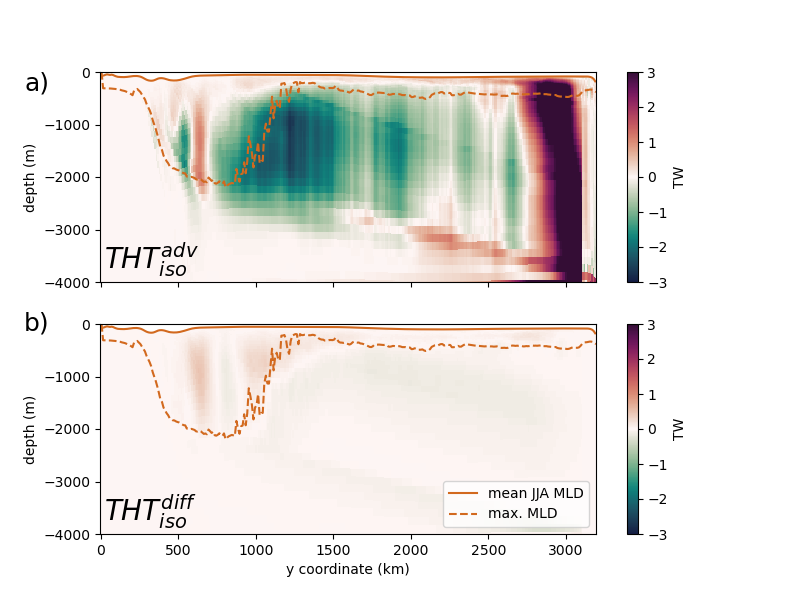

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

p1 = ax[0].pcolormesh(iso.YG, zs, iso.iso_ADV_z.T, 
               vmin=-3, vmax=3, cmap=cmo.curl)
p2 = ax[1].pcolormesh(iso.YG, zs, iso.iso_DIFF_z.T, 
               vmin=-3, vmax=3, cmap=cmo.curl)
for a in range(0, 2):
    mld.plot(ax=ax[a], color="chocolate", label="mean JJA MLD")
    mldmax.plot(ax=ax[a], color="chocolate", linestyle="--", label="max. MLD")
    ax[a].set_ylim(-4000, 0)
    ax[a].set_ylabel("depth (m)")
    plt.colorbar(p1, ax=ax[a], label="TW")
    ax[a].set_xticks(np.arange(0, 3.2e6, 0.5e6))

ax[0].set_xticklabels([])
ax[1].set_xticklabels(np.arange(0, 3200, 500))
ax[0].set_xlabel("")
ax[1].set_xlabel("y coordinate (km)")
plt.legend(loc=4)
ax[0].text(0.02e6, -3950, r"$THT_{iso}^{adv}$", ha="left", va="bottom", fontsize=20)
ax[1].text(0.02e6, -3950, r"$THT_{iso}^{diff}$", ha="left", va="bottom", fontsize=20)

fig.text(0.03, 0.85, "a)", fontsize=18)
fig.text(0.03, 0.45, "b)", fontsize=18)

plt.savefig("figS07-THTiso_adv_diff.png", dpi=300)